<a href="https://colab.research.google.com/github/vasu-rguktn/Team_X/blob/main/householdpowerconsumption.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.listdir()


['.config',
 'individual+household+electric+power+consumption.zip',
 'sample_data']

In [ ]:
import zipfile

zip_path = "individual+household+electric+power+consumption.zip"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("power_data")

print("Extraction done")


Extraction done


In [ ]:
import os
os.listdir("power_data")


['household_power_consumption.txt']

In [ ]:
import pandas as pd

file_path = "power_data/household_power_consumption.txt"

df = pd.read_csv(
    file_path,
    sep=";",
    na_values="?",
    low_memory=False
)

df.head()


,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [ ]:
df.columns = df.columns.str.strip()
print(df.columns)



Index(['Global_active_power', 'Global_reactive_power', 'Voltage',
       'Global_intensity', 'Sub_metering_1', 'Sub_metering_2',
       'Sub_metering_3'],
      dtype='object')


In [ ]:
X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]
split = int(len(df) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]



In [ ]:
X_train.isna().sum()



,0
Global_reactive_power,11482
Voltage,11482
Global_intensity,11482
Sub_metering_1,11482
Sub_metering_2,11482
Sub_metering_3,11482


In [ ]:
X = df.drop("Global_active_power", axis=1)
y = df["Global_active_power"]
mask = X.notna().all(axis=1)

X = X[mask]
y = y[mask]
X.isna().sum()



,0
Global_reactive_power,0
Voltage,0
Global_intensity,0
Sub_metering_1,0
Sub_metering_2,0
Sub_metering_3,0


In [ ]:
split = int(len(X) * 0.8)

X_train = X.iloc[:split]
X_test  = X.iloc[split:]

y_train = y.iloc[:split]
y_test  = y.iloc[split:]


In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


MAE: 0.024490033253512084
RMSE: 0.039742879788467494


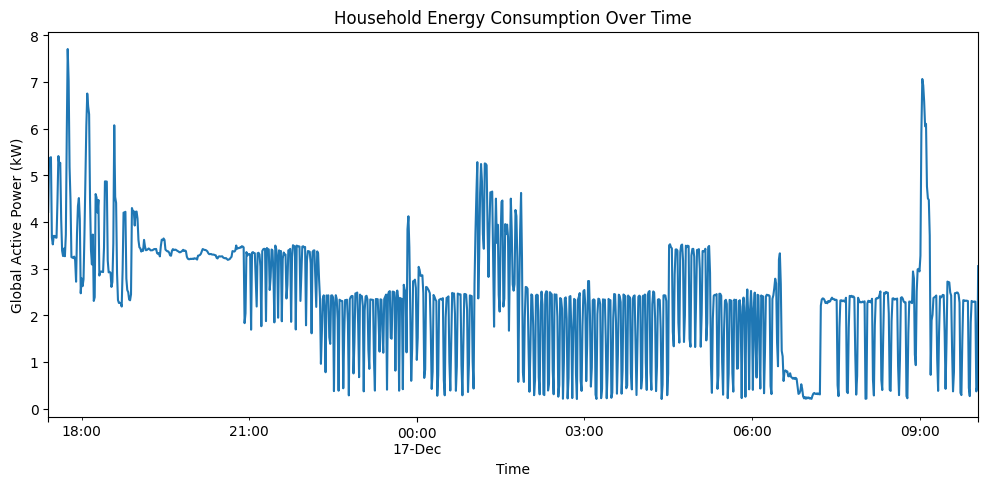

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
df["Global_active_power"].iloc[:1000].plot()
plt.title("Household Energy Consumption Over Time")
plt.xlabel("Time")
plt.ylabel("Global Active Power (kW)")
plt.show()


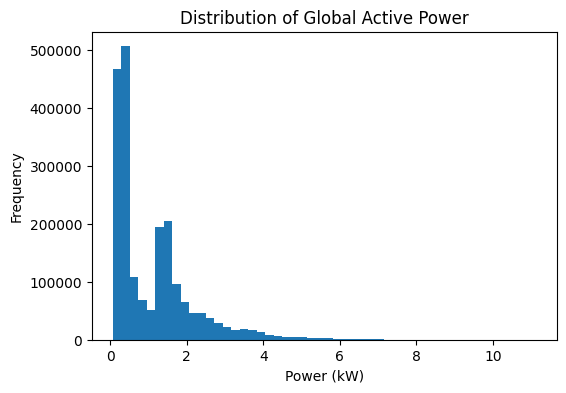

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["Global_active_power"], bins=50)
plt.title("Distribution of Global Active Power")
plt.xlabel("Power (kW)")
plt.ylabel("Frequency")
plt.show()


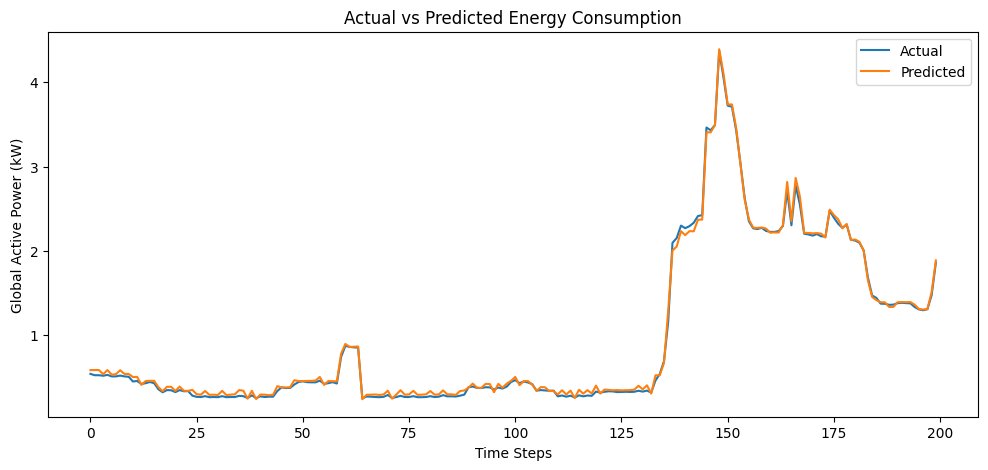

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(y_test.values[:200], label="Actual")
plt.plot(y_pred[:200], label="Predicted")
plt.title("Actual vs Predicted Energy Consumption")
plt.xlabel("Time Steps")
plt.ylabel("Global Active Power (kW)")
plt.legend()
plt.show()
